# 30 Dor far red lines: 7800–8700 Å, 8600–9500 Å

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys

sys.path.append("../lib")
import moments
import extract

sns.set_context("talk")
sns.set_color_codes()

## Start with 7800–8700

In [2]:
cubeA = Cube("../big-data/lmc-30dor-A-subcube-78-87.fits")
cubeB = Cube("../big-data/lmc-30dor-B-subcube-78-87.fits")
cubeC = Cube("../big-data/lmc-30dor-C-subcube-78-87.fits")
cubeD = Cube("../big-data/lmc-30dor-D-subcube-78-87.fits")

### Inspect the average spectrum for each field

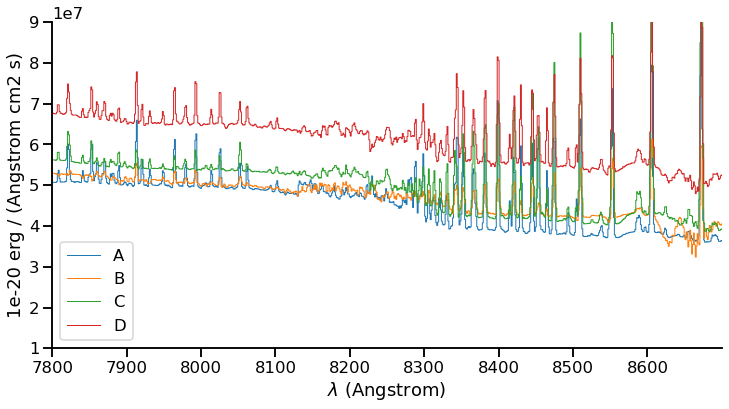

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
for cube, label in zip([cubeA, cubeB, cubeC, cubeD], "ABCD"):
    cube.sum(axis=(1, 2)).plot(label=label)
ax.legend()
ax.set(
    ylim=[0.1e8, 0.9e8],
)
sns.despine()

We can see the optical ghost around 8600 Å.  But the main problem here is going to be the Paschen jump.  Let us hope that a 5th order polynomial can fit it OK.

### Define continuum wavelength ranges

We can try the same wav ranges as we used for NGC 346

In [45]:
wavranges = [
    (7800, 7805), (7825, 7835), (7900, 7910),
    (7935, 7950), (8000, 8010), (8025, 8045), (8067, 8082),
    (8107, 8125), (8160, 8180),
    (8200, 8220), (8250, 8270), (8354, 8364), (8368, 8378), (8385, 8395),
    (8405, 8415), (8432, 8442), (8480, 8490),
    (8525, 8535), (8560, 8570), (8590, 8600),
    (8620, 8640), (8680, 8700),
]

In [46]:
nv, ny, nx = cubeA.data.shape
ny, nx

(321, 319)

Split each field up into 4 roughly equal tiles:

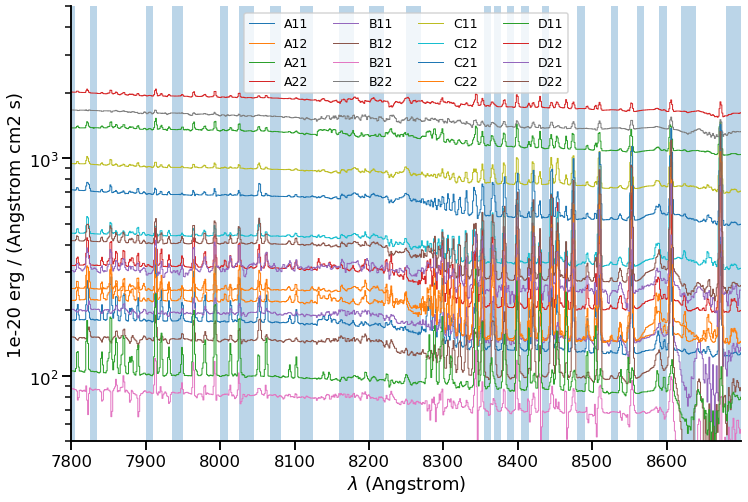

In [47]:
mm = 160  # middle of each image
fig, ax = plt.subplots(figsize=(12, 8))
for cube, label in zip([cubeA, cubeB, cubeC, cubeD], "ABCD"):
    cu11 = cube[:, :mm, :mm]
    cu12 = cube[:, :mm, mm:]
    cu21 = cube[:, mm:, :mm]
    cu22 = cube[:, mm:, mm:]
    cu11.mean(axis=(1, 2)).plot(label=f"{label}11")
    cu12.mean(axis=(1, 2)).plot(label=f"{label}12")
    cu21.mean(axis=(1, 2)).plot(label=f"{label}21")
    cu22.mean(axis=(1, 2)).plot(label=f"{label}22")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=4, fontsize="x-small")
ax.set(
    yscale="log",
    ylim=[50, 5e3],
)
sns.despine()

### Test the polynomial fitting with field A

This takes about a minute for each field.

In [48]:
contA = extract.fit_continuum(
    cubeA,
    wav_ranges=wavranges,
    deg=8,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


#### Inspect the results for different portions of the field.

[(0.0, 800.0)]

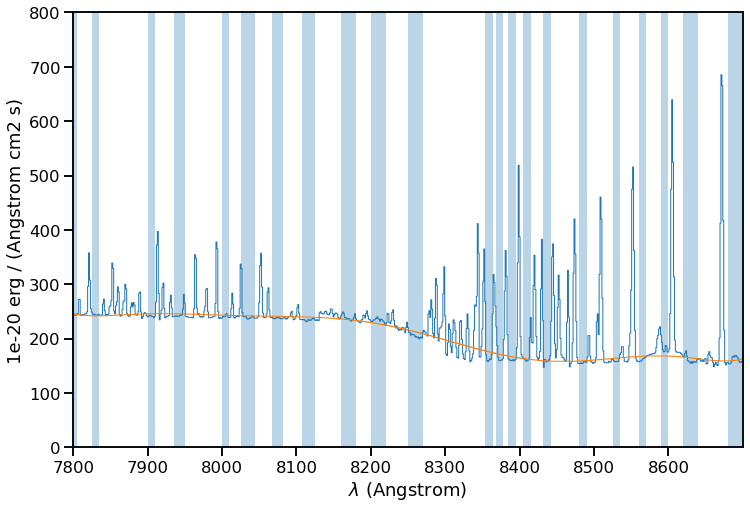

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
cubeA[:, 275:300, 120:150].mean(axis=(1, 2)).plot()
contA[:, 275:300, 120:150].mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[0, 800])

I had to go back and forth a few times adjusting the wav ranges.  It is difficult to get a good fit on the blue side because of the WR features.

As can be seen here, the final version is not perfect – it slightly overpredicts the continuum around 4700 to 4800.  This might affect some of the weak [Fe III] lines, but the [Ar IV] 4740 does not seem to be much affected.

### Now do the other fields

In [50]:
contB = extract.fit_continuum(
    cubeB,
    wav_ranges=wavranges,
    deg=8,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


In [51]:
contC = extract.fit_continuum(
    cubeC,
    wav_ranges=wavranges,
    deg=8,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


In [52]:
contD = extract.fit_continuum(
    cubeD,
    wav_ranges=wavranges,
    deg=8,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


### Save the continuum-subtracted cubes

In [53]:
csub = {}
cdiv = {}
for cube, cont, label in zip(
    [cubeD, cubeC, cubeB, cubeA],
    [contD, contC, contB, contA],
    "DCBA",
):
    prefix = f"../big-data/lmc-30dor-{label}-subcube-78-87"
    csub[label] = cube - cont
    cdiv[label] = cube / cont
    csub[label].write(
        f"{prefix}-contsub.fits",
        savemask="nan",
    )
    cdiv[label].write(
        f"{prefix}-contdiv.fits",
        savemask="nan",
    )
    cont.write(
        f"{prefix}-cont.fits",
        savemask="nan",
    )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


## Repeat for the next range: 8600 to 9500

In [54]:
cubeA = Cube("../big-data/lmc-30dor-A-subcube-86-95.fits")
cubeB = Cube("../big-data/lmc-30dor-B-subcube-86-95.fits")
cubeC = Cube("../big-data/lmc-30dor-C-subcube-86-95.fits")
cubeD = Cube("../big-data/lmc-30dor-D-subcube-86-95.fits")

### 86–95 Inspect the average spectrum for each field

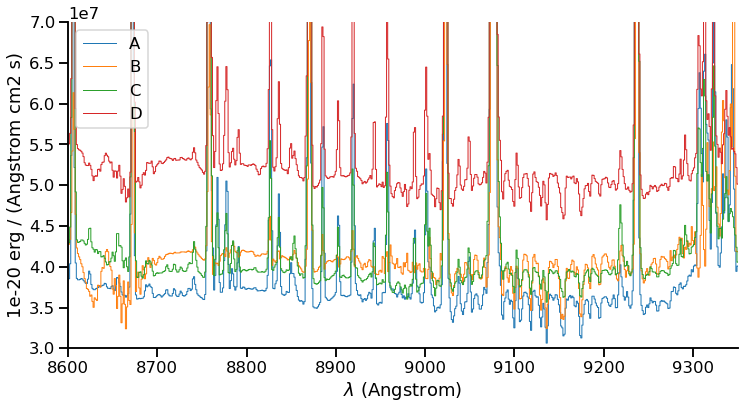

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
for cube, label in zip([cubeA, cubeB, cubeC, cubeD], "ABCD"):
    cube.sum(axis=(1, 2)).plot(label=label)
ax.legend()
ax.set(
    ylim=[0.3e8, 0.7e8],
)
sns.despine()

Again, we get WR features (I think)  around 7120, and some over compensation for the atmospheric asbsorption.

### 86–95 Define continuum wavelength ranges

No large ranges of clear continuum here

In [ ]:
wavranges = [
    (7015, 7040), (7090, 7100), (7150, 7160),
    (7210, 7225), (7260, 7275), 
    (7380, 7390),
    (7410, 7420), (7450, 7460),
    (7510, 7520),
    (7720, 7740),
    (7780, 7790), (7830, 7840),
    (7890, 7900),
]

In [ ]:
nv, ny, nx = cubeA.data.shape
ny, nx

Split each field up into 4 roughly equal tiles:

In [ ]:
mm = 160  # middle of each image
fig, ax = plt.subplots(figsize=(12, 8))
for cube, label in zip([cubeA, cubeB, cubeC, cubeD], "ABCD"):
    cu11 = cube[:, :mm, :mm]
    cu12 = cube[:, :mm, mm:]
    cu21 = cube[:, mm:, :mm]
    cu22 = cube[:, mm:, mm:]
    cu11.mean(axis=(1, 2)).plot(label=f"{label}11")
    cu12.mean(axis=(1, 2)).plot(label=f"{label}12")
    cu21.mean(axis=(1, 2)).plot(label=f"{label}21")
    cu22.mean(axis=(1, 2)).plot(label=f"{label}22")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=4, fontsize="x-small")
ax.set(
    yscale="log",
    ylim=[40, 8e3],
)
sns.despine()

### 70–79 Test the polynomial fitting with field A

This takes about a minute for each field.

In [ ]:
contA = extract.fit_continuum(
    cubeA,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

#### 70–79 Inspect the results for different portions of the field.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
cubeA[:, 275:300, 120:150].mean(axis=(1, 2)).plot()
contA[:, 275:300, 120:150].mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[0, 800])

### 70–79 Now do the other fields

In [ ]:
contB = extract.fit_continuum(
    cubeB,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

In [ ]:
contC = extract.fit_continuum(
    cubeC,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

In [ ]:
contD = extract.fit_continuum(
    cubeD,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

### 70–79 Save the continuum-subtracted cubes

In [ ]:
csub = {}
cdiv = {}
for cube, cont, label in zip(
    [cubeD, cubeC, cubeB, cubeA],
    [contD, contC, contB, contA],
    "DCBA",
):
    prefix = f"../big-data/lmc-30dor-{label}-subcube-70-79"
    csub[label] = cube - cont
    cdiv[label] = cube / cont
    csub[label].write(
        f"{prefix}-contsub.fits",
        savemask="nan",
    )
    cdiv[label].write(
        f"{prefix}-contdiv.fits",
        savemask="nan",
    )
    cont.write(
        f"{prefix}-cont.fits",
        savemask="nan",
    )